In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("data.csv")

In [3]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.drop("id",axis=1,inplace=True)

In [5]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
import seaborn as sns

C:\Users\Hi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:xlabel='diagnosis', ylabel='radius_mean'>

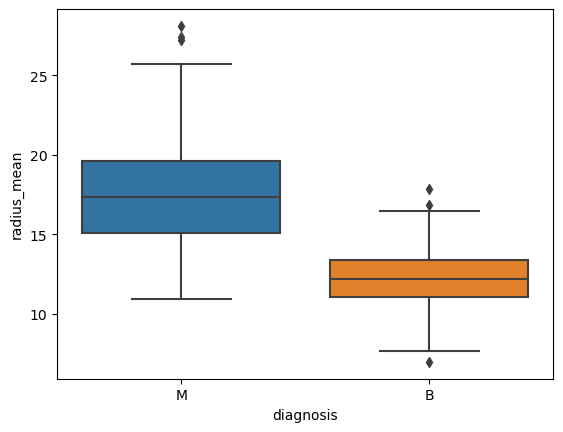

In [7]:
sns.boxplot(x="diagnosis",y="radius_mean",data=df)

<AxesSubplot:xlabel='diagnosis', ylabel='texture_mean'>

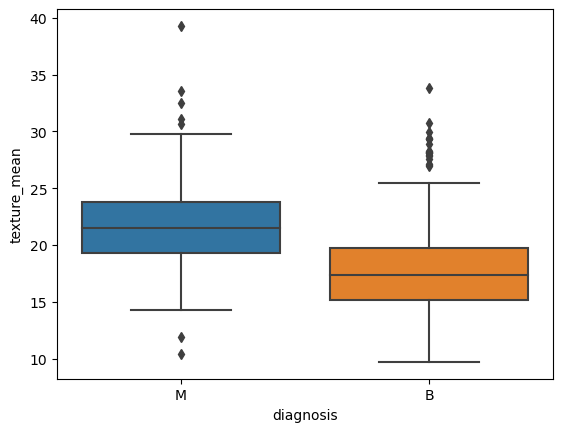

In [8]:
sns.boxplot(x="diagnosis",y="texture_mean",data=df)

<AxesSubplot:xlabel='diagnosis', ylabel='smoothness_mean'>

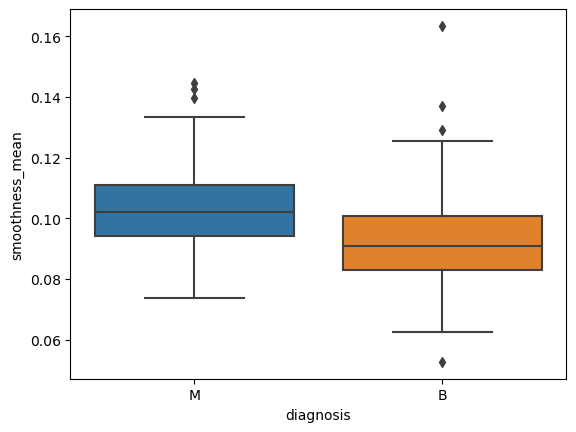

In [9]:
sns.boxplot(x="diagnosis",y="smoothness_mean",data=df)

<AxesSubplot:xlabel='diagnosis', ylabel='concavity_mean'>

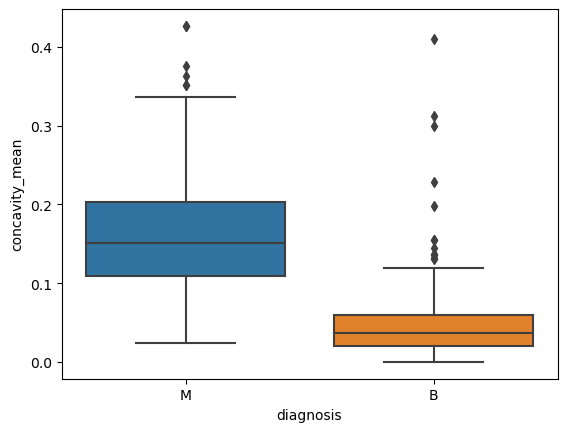

In [10]:
sns.boxplot(x="diagnosis",y="concavity_mean",data=df)

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

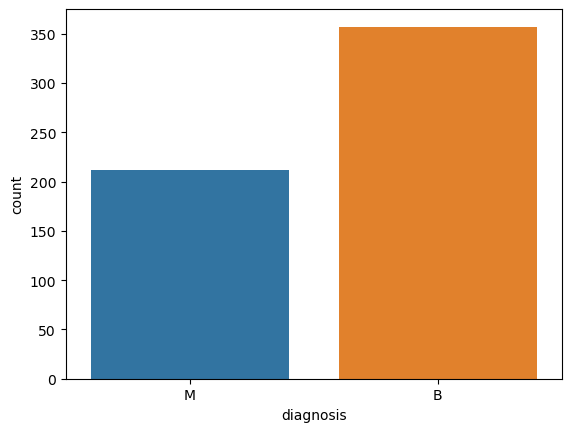

In [11]:
sns.countplot(x="diagnosis",data=df)

In [12]:
df.replace({"diagnosis":{"M":0,"B":1}},inplace=True)

In [13]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [14]:
def replace_with_median(df,col):
    median_value=df[col].median()
    df[col].fillna(median_value,inplace=True)

In [15]:
x=df.drop('diagnosis',axis=1)
Y=df['diagnosis']

In [16]:
Y.fillna(1,inplace=True)

In [17]:
Y.isnull().sum()

0

In [18]:
y=Y.values

In [19]:
for i in x.columns:
    replace_with_median(df,i)

In [20]:
x.isnull().sum()

radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: int64

In [21]:
x.drop("Unnamed: 32",axis=1,inplace=True)

In [22]:
x.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler=MinMaxScaler()

In [27]:
scaler.fit_transform(x_train)

array([[1.00000000e+00, 2.96246195e-01, 1.00000000e+00, ...,
        5.48109966e-01, 1.61671924e-02, 3.39587401e-04],
       [1.52260150e-01, 0.00000000e+00, 1.48314127e-01, ...,
        1.58178694e-01, 1.03312303e-01, 1.84905340e-01],
       [2.13477643e-01, 1.66384850e-01, 2.14255228e-01, ...,
        2.25017182e-01, 2.32847003e-01, 2.36013244e-01],
       ...,
       [1.25814193e-01, 2.32330064e-01, 1.27543036e-01, ...,
        2.86357388e-01, 2.21805994e-01, 3.36021734e-01],
       [2.11028944e-01, 6.26310450e-01, 2.05221226e-01, ...,
        2.44536082e-01, 1.73698738e-01, 2.26929281e-01],
       [2.54615799e-01, 1.15319581e-01, 2.41641770e-01, ...,
        1.84398625e-01, 1.46490536e-01, 1.18346209e-01]])

In [28]:
scaler.transform(x_test)

array([[0.36284833, 0.22590463, 0.36747759, ..., 0.48900344, 0.20189274,
        0.19169709],
       [0.12581419, 0.08488333, 0.1268317 , ..., 0.23010309, 0.27030757,
        0.18685797],
       [0.53670601, 0.26682448, 0.5390525 , ..., 0.81718213, 0.44026025,
        0.31106206],
       ...,
       [0.57343651, 0.46635103, 0.57746479, ..., 0.53745704, 0.26695584,
        0.17768911],
       [0.36382781, 0.23571187, 0.36178688, ..., 0.43024055, 0.36455047,
        0.35817981],
       [0.24824918, 0.1237741 , 0.24448712, ..., 0.2890378 , 0.19676656,
        0.2319382 ]])

In [29]:
model=Sequential()

In [30]:
from tensorflow.keras.layers import Dropout

In [31]:
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [32]:
model.fit(x=x_train,y=y_train,epochs=600,validation_data=(x_test,y_test))

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.5468 - val_loss: 1.0854
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0596 - val_loss: 0.6147
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5806 - val_loss: 0.4192
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3340 - val_loss: 0.2660
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2446 - val_loss: 0.2316
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2342 - val_loss: 0.2374
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2296 - val_loss: 0.2245
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2452 - val_loss: 0.2194
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2002 - val_loss: 0.2575
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2483 - val_loss: 0.2553
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2846 - val_loss: 0.2665
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2014 - val_loss: 0.1024
Epoch 138/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1410 - val_loss: 0.2413
Epoch 139/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2131 - val_loss: 0.1489
Epoch 140/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1776 - val_loss: 0.0989
Epoch 141/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1869 - val_loss: 0.1089
Epoch 142/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1517 - val_loss: 0.1319
Epoch 143/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2162 - val_loss: 0.1706
Epoch 144/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1742 - val_loss: 0.1161
Epoch 145/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1895 - val_loss: 0.2336
Epoch 146/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2704 - val_loss: 0.1037
Epoch 147/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1698 - val_loss: 0.3254
Epoch 148/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - lo

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1479 - val_loss: 0.0795
Epoch 272/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1389 - val_loss: 0.1220
Epoch 273/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1591 - val_loss: 0.1140
Epoch 274/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1374 - val_loss: 0.0795
Epoch 275/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1006 - val_loss: 0.0861
Epoch 276/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1249 - val_loss: 0.0854
Epoch 277/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1185 - val_loss: 0.0799
Epoch 278/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1502 - val_loss: 0.1080
Epoch 279/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1036 - val_loss: 0.0831
Epoch 280/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1269 - val_loss: 0.0713
Epoch 281/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1327 - val_loss: 0.0848
Epoch 282/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1820 - val_loss: 0.1295
Epoch 406/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2056 - val_loss: 0.0647
Epoch 407/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1034 - val_loss: 0.0589
Epoch 408/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0861 - val_loss: 0.0820
Epoch 409/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1043 - val_loss: 0.1282
Epoch 410/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1255 - val_loss: 0.0689
Epoch 411/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1116 - val_loss: 0.0975
Epoch 412/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1299 - val_loss: 0.0580
Epoch 413/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1719 - val_loss: 0.0620
Epoch 414/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1211 - val_loss: 0.0780
Epoch 415/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2026 - val_loss: 0.0681
Epoch 416/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1946 - val_loss: 0.0586
Epoch 540/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0746 - val_loss: 0.0605
Epoch 541/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0884 - val_loss: 0.0704
Epoch 542/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0771 - val_loss: 0.0651
Epoch 543/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0716 - val_loss: 0.0830
Epoch 544/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0908 - val_loss: 0.0621
Epoch 545/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0890 - val_loss: 0.0599
Epoch 546/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1323 - val_loss: 0.1025
Epoch 547/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1025 - val_loss: 0.0955
Epoch 548/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0978 - val_loss: 0.1489
Epoch 549/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1159 - val_loss: 0.0834
Epoch 550/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - lo

In [33]:
losses_df=pd.DataFrame(model.history.history)

In [34]:
losses_df.head(5)

,loss,val_loss
0,2.203427,1.085424
1,0.913108,0.614674
2,0.503657,0.419199
3,0.349244,0.265956
4,0.269345,0.231563


<AxesSubplot:>

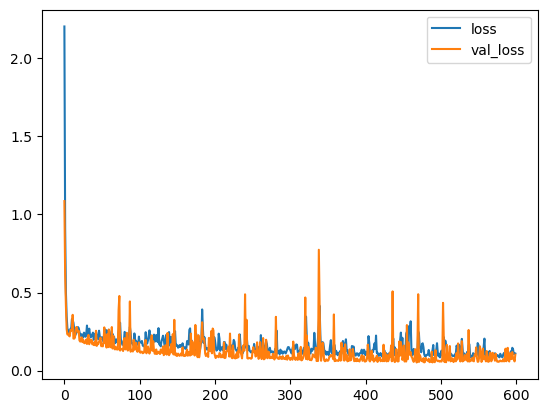

In [35]:
losses_df.plot(kind="line")

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.src.callbacks.early_stopping:

class EarlyStopping(keras.src.callbacks.callback.Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |      monitor: Quantity to be monitored. Defaults 

In [38]:
earlystopping=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [39]:
model.fit(x=x_train,y=y_train,epochs=600,validation_data=(x_test,y_test),callbacks=[earlystopping])

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1165 - val_loss: 0.0600
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0970 - val_loss: 0.0570
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1045 - val_loss: 0.0844
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0946 - val_loss: 0.0654
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0807 - val_loss: 0.0765
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1075 - val_loss: 0.0685
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0875 - val_loss: 0.0768
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1192 - val_loss: 0.1579
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0931 - val_loss: 0.0595
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0890 - val_loss: 0.1458
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1338 - val_loss: 0.0716
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1

In [40]:
losses_df2=pd.DataFrame(model.history.history)

<AxesSubplot:>

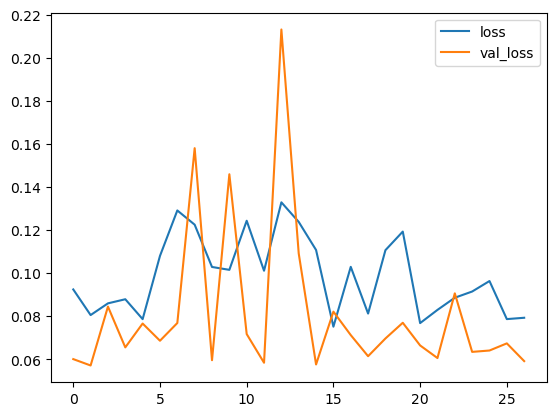

In [41]:
losses_df2.plot(kind="line")

In [42]:
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [43]:
model.fit(x=x_train,y=y_train,epochs=600,validation_data=(x_test,y_test),callbacks=[earlystopping])

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7201 - val_loss: 0.7013
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7025 - val_loss: 0.6934
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7006 - val_loss: 0.6855
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6820 - val_loss: 0.6803
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6835 - val_loss: 0.6757
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6855 - val_loss: 0.6718
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6734 - val_loss: 0.6687
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6745 - val_loss: 0.6665
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6788 - val_loss: 0.6647
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6616 - val_loss: 0.6625
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6566 - val_loss: 0.6610
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

In [44]:
losses_df3=pd.DataFrame(model.history.history)

<AxesSubplot:>

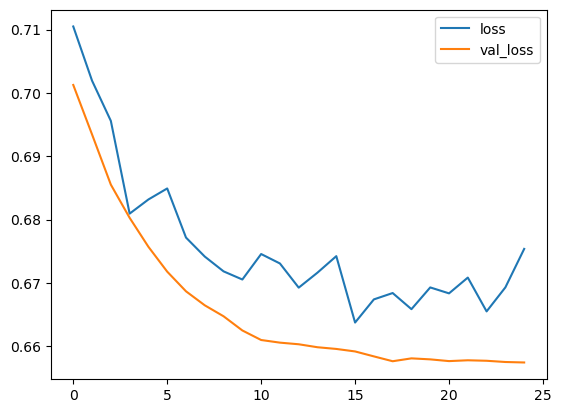

In [45]:
losses_df3.plot(kind="line")

In [46]:
predictions=model.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(predictions)

In [49]:
predictions

array([[0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.5990313 ],
       [0.599

In [50]:
print(type(predictions))

<class 'numpy.ndarray'>


In [51]:
for i in predictions:
    print(i)

[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5990313]
[0.5

In [52]:
predictions.shape

(143, 1)

In [54]:
predictions_reshape=predictions.reshape(1,-1)

In [55]:
print(predictions_reshape)

[[0.5990313  0.5990313  0.5990313  0.5990313  0.5990313  0.5990313
  0.5990313  0.5990313  0.5990313  0.5990313  0.5990313  0.5990313
  0.5990313  0.5990313  0.5990313  0.5990313  0.5990313  0.5990313
  0.5990313  0.5990313  0.5990313  0.5990313  0.5990313  0.5990313
  0.5990313  0.5990313  0.5990313  0.5990313  0.5990313  0.5990313
  0.5990313  0.5990313  0.5990313  0.5990313  0.5990313  0.5990313
  0.5990313  0.5990313  0.5990313  0.5990313  0.5990313  0.5990313
  0.5990313  0.5990313  0.5990313  0.5990313  0.5990313  0.5990313
  0.5990313  0.5990313  0.5990313  0.5990313  0.5990313  0.5990313
  0.5990313  0.5990313  0.5990313  0.5990313  0.5990313  0.5990313
  0.5990313  0.5990313  0.5990313  0.5990313  0.5990313  0.5990313
  0.5990313  0.5990313  0.5990313  0.5990313  0.5990313  0.5990313
  0.5990313  0.5990313  0.5990313  0.5990313  0.5990313  0.5990313
  0.5990313  0.5990313  0.5990313  0.5990313  0.5990313  0.5990313
  0.5990313  0.5990313  0.5990313  0.5990313  0.5990313  0.599

In [59]:
for i in predictions_reshape:
    for j in i:
        print(j)

0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313
0.5990313


In [66]:
def cont_to_class(array):
    res=[]
    for i in array:
        for j in i:
            if(j>=0.5):
                res.append(1)
            else:
                res.append(0)
    return res
    

In [70]:
res=cont_to_class(predictions_reshape)

In [71]:
predictions_reshape

array([[0.5990313 , 0.5990313 , 0.5990313 , 0.5990313 , 0.5990313 ,
        0.5990313 , 0.5990313 , 0.5990313 , 0.5990313 , 0.5990313 ,
        0.5990313 , 0.5990313 , 0.5990313 , 0.5990313 , 0.5990313 ,
        0.5990313 , 0.5990313 , 0.5990313 , 0.5990313 , 0.5990313 ,
        0.5990313 , 0.5990313 , 0.5990313 , 0.5990313 , 0.5990313 ,
        0.5990313 , 0.5990313 , 0.5990313 , 0.5990313 , 0.5990313 ,
        0.5990313 , 0.5990313 , 0.5990313 , 0.5990313 , 0.5990313 ,
        0.5990313 , 0.5990313 , 0.5990313 , 0.5990313 , 0.5990313 ,
        0.5990313 , 0.5990313 , 0.5990313 , 0.5990313 , 0.5990313 ,
        0.5990313 , 0.5990313 , 0.5990313 , 0.5990313 , 0.5990313 ,
        0.5990313 , 0.5990313 , 0.5990313 , 0.5990313 , 0.5990313 ,
        0.5990313 , 0.5990313 , 0.5990313 , 0.5990313 , 0.5990313 ,
        0.5990313 , 0.5990313 , 0.5990313 , 0.5990313 , 0.5990313 ,
        0.5990313 , 0.5990313 , 0.5990313 , 0.5990313 , 0.5990313 ,
        0.5990313 , 0.5990313 , 0.5990313 , 0.59

In [72]:
res

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [73]:
res_array=np.asarray(res)

In [74]:
print(classification_report(res_array,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.64      0.78       143

    accuracy                           0.64       143
   macro avg       0.50      0.32      0.39       143
weighted avg       1.00      0.64      0.78       143



C:\Users\Hi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
con=confusion_matrix(y_test,res_array)

<AxesSubplot:>

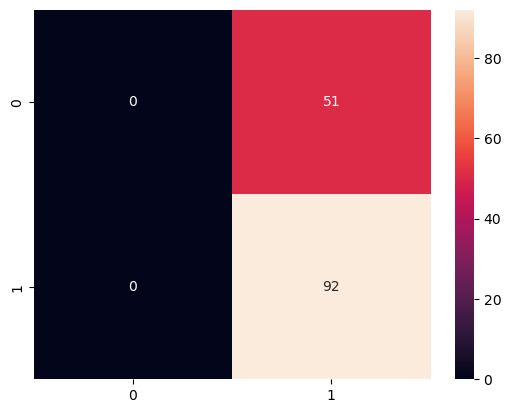

In [77]:
sns.heatmap(con,annot=True)